Challenge is to predict which African startups will make it to a Series A round.
Have over 4,000+ African companies that have raised funding and other data points about them.
Given a startup/company, can one predict probability of success. Informs sourcing and investment screening.
Leads to an investability score.
However, the recall metric for all three classifiers was very low. This means that models misclassified 70% of successful startups as unsuccessful. 
We would like the algorithm to discover more successful startups and not only those which follow the most popular patterns.

Series A financing refers to an investment in a privately-held, 
start-up company after it has shown progress in building its business model and demonstrates the potential to grow and generate revenue.

In [1]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
#import pandas as pd
#import numpy as np
# Data visualization
#import matplotlib.pyplot as plt
#import seaborn as sns

# Model and performance
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
%matplotlib inline


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
#df = pd.read_csv('MOCK_DATA (2).csv')
df = pd.read_excel ('Companies.xlsx')
df.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Duplication.1,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0,2012.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.replace("?", np.nan, inplace = True)
#df.head(5)

In [6]:
missing_data = df.isnull()
#missing_data.head(5)

In [7]:
#for column in missing_data.columns.values.tolist():
    #print(column)
    #print (missing_data[column].value_counts())
    #print("")  

In [8]:
df.shape

(3084, 118)

In [9]:
#10_Total_Venture_Funding (Disclosed)
#df_needed['10.2_Number of Venture Funding rounds (#)'].unique()
df['10.2_Number of Venture Funding rounds (#)'].notnull().sum()

51

In [10]:
df.loc[df['10.2_Number of Venture Funding rounds (#)'] == 3]

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Duplication.1,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Average time of rounds(days),Year of recieving Series A
207,CHIL AI Lab,CHIL AI Lab is using artificial intelligence a...,Active,2018.0,"Kampala, Uganda","Juba, South Sudan",Uganda,Uganda,"Uganda, Zambia, Democratic Republic of Congo ,...",Uganda,350000.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Shamim Nabuuma, Agaba Peter",1,Healthcare & Pharma,HealthTech,B2B,"Tony Elumelu Foundation Entrepreneurship, UN...",11-50,http://www.cdarh.org/,-,-,https://www.facebook.com/cdarhug/,0.741935,NaN,NaN,NaN,NaN,0.0,Health & Pharmaceuticals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[df['10.2_Number of Venture Funding rounds (#)'].isna()]

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Duplication.1,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0,2012.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
df_deals = pd.read_excel ('Deals (investment).xlsx')
df_deals.head()

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Duplication,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Investor 15,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1,Investor 13.1,Investor 14.1,Investor 15.1
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,9.0,3.0,2.0,1.0,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,Information Technology,biNu,0.900000,NaN,NaN,1.0,2008.0,14220000.0,1.0,2. Seed,Other Technologies & Information Technology,2008.0,11.0,4.0,2.0,1.0,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,0.900000,NaN,NaN,1.0,2004.0,12700000.0,0.0,6. Private Equity,Financial Services,2009.0,12.0,4.0,2.0,1.0,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,NaN,NaN,0.642857,NaN,NaN,1.0,NaN,27800000.0,NaN,1. Grant,NaN,2009.0,12.0,4.0,2.0,1.0,Omidyar Network,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,Omidyar Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,4.0,2.0,1.0,1.0,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_deals['1_post_date'].map(pd.to_datetime)

0      2008-09-01
1      2008-11-01
2      2009-12-03
3      2009-12-11
4      2010-04-01
          ...    
2054          NaT
2055          NaT
2056          NaT
2057          NaT
2058          NaT
Name: 1_post_date, Length: 2059, dtype: datetime64[ns]

In [14]:
def get_year(dt):
    return dt.year

df_deals['year'] = df_deals['1_post_date'].map(get_year)
#df_deals

Text(0.5, 1.0, 'Years with highest posts')

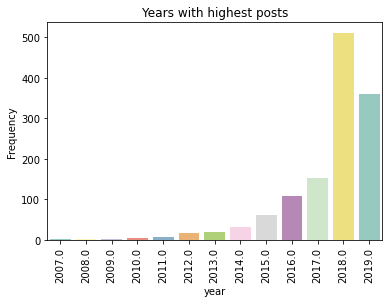

In [15]:
ax=sns.countplot(x = 'year', data = df_deals, palette = 'Set3' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.set_xlabel('year')
ax.set_ylabel('Frequency')
ax.set_title('Years with highest posts')

In [16]:
a=df_deals['2_post_title'].unique().tolist()
#a

In [17]:
len(a)


801

In [18]:
df_new = df_deals[['2_post_title','1_post_date','5_funding_round','Country(HQ)']]
#brics[["country", "capital"]]
df_new.head()
df_andela = df_new.loc[df_new['2_post_title'] == "Andela"]
df_andela

,2_post_title,1_post_date,5_funding_round,Country(HQ)
72,Andela,2014-09-23,Seed,United States
107,Andela,2015-06-25,Series A,United States
182,Andela,2016-06-20,Series B,United States
358,Andela,2017-11-10,Series C,United States
928,Andela,2019-01-23,Series D,United States


In [19]:
#df_andela.set_index('Year').diff()
df_andela['A_dif'] = df_andela['1_post_date'].diff()
df_andela['A_dif']

/tmp/ipykernel_7054/1457665814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_andela['A_dif'] = df_andela['1_post_date'].diff()


72         NaT
107   275 days
182   361 days
358   508 days
928   439 days
Name: A_dif, dtype: timedelta64[ns]

In [20]:
#df_andela['A_dif'].fillnat(0)

#df["weight"].mean()

In [21]:
df_andela['A_dif'].mean()

Timedelta('395 days 18:00:00')

In [22]:
#df.drop["Unnamed:66","Unnamed:67","Unnamed:68","Unnamed:69","Unnamed:70"]
df_needed=df.drop(['Unnamed: 66','Unnamed: 67','Unnamed: 68','Unnamed: 69','Unnamed: 70','Unnamed: 71','Unnamed: 72',
         'Unnamed: 73','Unnamed: 74','Unnamed: 75','Unnamed: 76','Unnamed: 77','Unnamed: 78','Unnamed: 79','Unnamed: 80',
         'Unnamed: 82','Unnamed: 83','Unnamed: 84','Unnamed: 85','Unnamed: 86','Unnamed: 87','Unnamed: 88','Unnamed: 89',
         'Unnamed: 90','Unnamed: 91',
         'Unnamed: 92','Unnamed: 93','Unnamed: 94','Unnamed: 95','Unnamed: 96','Unnamed: 97','Unnamed: 98','Unnamed: 100',
         'Unnamed: 101','Unnamed: 102','Unnamed: 103','Unnamed: 104','Unnamed: 105','Unnamed: 106','Unnamed: 107','Unnamed: 108',
         'Unnamed: 109','Unnamed: 110','Unnamed: 111','Unnamed: 112','Unnamed: 113','Unnamed: 114','Unnamed: 115','Unnamed: 99'], axis = 1)
df_needed.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",NaN,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,https://twitter.com/takealot,https://www.facebook.com/Takealot,0.677419,NaN,Takealot,1.0,Takealot,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takealottakealot.com is one of SA's largest on...,1054.0,NaN
3,Zola Electric,ZOLA Electric (formerly Off Grid Electric) is ...,Active,2011.0,"Arusha, Tanzania",NaN,Tanzania,Tanzania,Tanzania,NaN,NaN,NaN,NaN,"GE Ventures, Helios Investment Partne

In [23]:
#10_Total_Venture_Funding (Disclosed)
#df_needed['10.2_Number of Venture Funding rounds (#)'].unique()
df_needed['10.2_Number of Venture Funding rounds (#)'].notnull().sum()

51

In [24]:
#df_needed['Average time of rounds(days)'].isnull().sum()
df_needed.shape

(3084, 69)

In [25]:
#df_needed['20_Female_Co-Founder (Yes = 1; No = 0)'].values 

In [26]:
df_needed["7.2_Assigned_Country (Africa)"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['7.2_Assigned_Country (Africa)'].isnull().sum()

0

In [27]:
df_needed["2_Company_description"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['2_Company_description'].isnull().sum()

0

In [28]:
df_needed["8_Countries_of_operation_(Business Model/Market)"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['8_Countries_of_operation_(Business Model/Market)'].isnull().sum()

0

In [29]:
df_needed["21_Main_sector"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['21_Main_sector'].isnull().sum()

0

In [30]:
df_needed["11_Investors"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['11_Investors'].isnull().sum()

0

In [31]:
df_needed["19_Founders"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['19_Founders'].isnull().sum()

0

In [32]:
df_needed["22_Categories"].fillna("Not known", inplace = True)
df_needed['22_Categories'].isnull().sum()

0

In [33]:
#6_Other_offices
df_needed["6_Other_offices"].fillna("Not known", inplace = True)
df_needed['6_Other_offices'].isnull().sum()

0

In [34]:
#Counting the numbers of countires where there are business market.
df_needed['number of market countires'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [35]:
#Counting the numbers of investors a company has.
df_needed['number of investors'] = df_needed['11_Investors'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [36]:
#19_Founders
#Counting the numbers of founders a company has.
df_needed['number of founders'] = df_needed['19_Founders'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [37]:
#Counting the numbers of bussiness categories a company has.
df_needed['number of bussiness categories'] = df_needed['22_Categories'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
#df_needed.head()

In [38]:
#Counting the numbers of Other offices a company has.
df_needed['number of other offices'] = df_needed['6_Other_offices'].apply(lambda x: len(x.split(','))if x != 'Not known' else 0)
df_needed.head()

,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices
0,Jumia Group,Jumia is connecting consumers and businesses a...,Active,2012.0,"Lagos, Nigeria","Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",Nigeria,Nigeria,"Nigeria, Egypt, Morocco, Kenya, Ivory Coast, S...",NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Series C,409806000,Series C,409806000,"Jeremy Hodara, Sacha Poignonnec",NaN,E-Commerce & Retail,"E-Commerce, Internet, Shopping Online",NaN,NaN,1001 - 5000,https://group.jumia.com/,https://www.linkedin.com/company/jumia-group/,https://twitter.com/Jumia_Group,https://www.facebook.com/jumiagroup/,0.709677,NaN,Jumia Group,1.0,Jumia Group,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumia GroupJumia is connecting consumers and b...,529.0,2012.0,14,0,2,3,14
1,Andela,Andela invests in Africa’s most talented softw...,Active,2014.0,"New York, united States","Nigeria, Kenya, Uganda, Rwanda",United States,Nigeria,"Nigeria, Kenya, Uganda, Rwanda",NaN,NaN,NaN,NaN,"Chan Zuckerberg Initiative, CRE Venture Capita...",NaN,NaN,2019-01-23 00:00:00,Series D,100000000,Series D,100000000,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",1,Commercial & Professional Services,"Edtech, BPO, Recruitment, Software, Training",B2B,Extreme Accelerator,500+,https://andela.com,https://www.linkedin.com/company/andela/,https://twitter.com/andela,https://www.facebook.com/pg/thisisandela/about/,0.870968,NaN,Andela,1.0,NaN,NaN,Other Technologies & Information Technology,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AndelaAndela invests in Africa’s most talented...,395.0,2015.0,4,6,6,5,4
2,Takealot,takealot.com is one of SA's largest online ret...,Acquired,2011.0,"Cape Town, South Africa",Not known,South Africa,South Africa,South Africa,NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,Venture Round,69000000,Venture Round,100000000,Kim Reid,NaN,E-Commerce & Retail,"E-Commerce, Logistics, Retail",NaN,NaN,1001-5000,https://www.takealot.com/,https://www.linkedin.com/company/takealot/,https://twitter.com/takealot,https://www.facebook.com/Takealot,0.677419,NaN,Takealot,1.0,Takealot,0.0,E-commerce & Retail,4. Late Venture,4. Late Venture,Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takealottakealot.com is one of SA's largest on...,1054.0,NaN,1,0,1,3,0
3,Zola Electr

In [39]:
#Using lambda functions in sorting and filtering data

In [40]:
#creating new columns with binary values
df_needed['Assigned_Country_Nigeria'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Nigeria' else 0)
df_needed['Assigned_Country_South Africa'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='South Africa' else 0)
df_needed['Assigned_Country_Kenya'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Kenya' else 0)
df_needed['Assigned_Country_Egypt'] = df_needed['7.2_Assigned_Country (Africa)'].apply(lambda x: 1 if x=='Egypt' else 0)
#df_needed.head()
#df_needed['7.2_Assigned_Country (Africa)'].value_counts() 

In [41]:
df_needed['Business_operated in South Africa'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'South Africa' in x.split(',') else 0) #those with python give 1 or else 0
df_needed['Business_operated in Nigeria'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Nigeria' in x.split(',') else 0)
df_needed['Business_operated in Kenya'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Kenya' in x.split(',') else 0)
df_needed['Business_operated in Egypt'] = df_needed['8_Countries_of_operation_(Business Model/Market)'].apply(lambda x: 1 if 'Egypt' in x.split(',') else 0)
#df_needed['Business_operated in Egypt'].value_counts() 
#df_needed.head()
#df_needed['8_Countries_of_operation_(Business Model/Market)'].value_counts() 

In [42]:
#df_needed['21_Main_sector'].value_counts() 

In [43]:
df_needed['Sector_Financial Services'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Financial Services' in x.split('&') else 0)
df_needed['Sector_Information Technology'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Information Technology' in x.split('&') else 0)
df_needed['Sector_E-Commerce & Retail'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'E-Commerce & Retail' in x.split('&') else 0)
df_needed['Sector_Commercial & Professional Services'] = df_needed['21_Main_sector'].apply(lambda x: 1 if 'Commercial & Professional Services' in x.split('&') else 0)
#df_needed['Sector_Commercial & Professional Services'].value_counts() 
#df_needed.head()

In [44]:
#global   checking out company descriptions with global
df_needed['global_Company'] = df_needed['2_Company_description'].apply(lambda x: 1 if '' in x.lower() else 0) #those with global  give 1 or else 0
df_needed['global_Company'].value_counts()   #counting the jobs with thedescription python 
#df_needed.head()

1    3084
Name: global_Company, dtype: int64

In [45]:
#df_needed['23_Business_Model'].value_counts()
#df_needed['23_Business_Model'].isnull().sum()
df_needed["23_Business_Model"].fillna("Not known", inplace = True) #replacing nan values with a string,not known
df_needed['23_Business_Model'].isnull().sum()

0

In [46]:
df_needed['Business_model_B2C'] = df_needed['23_Business_Model'].apply(lambda x: 1 if 'B2C' in x.split('/') else 0)
df_needed['Business_model_B2B'] = df_needed['23_Business_Model'].apply(lambda x: 1 if 'B2B' in x.split('/') else 0)
#df_needed['Business_model_B2C'].value_counts() 
#df_needed.head()

In [47]:
df_needed['Female_Co-Founder'] = df_needed['20_Female_Co-Founder (Yes = 1; No  = 0)'].apply(lambda x: 1 if x==1 else 0)
df_needed['Male_Co-Founder'] = df_needed['20_Female_Co-Founder (Yes = 1; No  = 0)'].apply(lambda x: 1 if x==0 else 0)
#df_needed.tail(20) 

In [48]:
#df_needed["25_Number_of_employees"].fillna("0", inplace = True)
#df_needed['25_Number_of_employees'].isnull().sum()

In [49]:
#df_needed['employees'] = df_needed['25_Number_of_employees'].apply(lambda x: x.replace('1001 - 5000', '1'))

In [50]:
pd.Timestamp(2017, 1, 1, 12)

Timestamp('2017-01-01 12:00:00')

In [51]:
df_needed.loc[df_needed['25_Number_of_employees'] == '10,000+']
#df_needed[df_needed["25_Number_of_employees"] == '2019-02-10 00:00:00']
#df_needed.loc[~df_needed['25_Number_of_employees'].isin "2019-02-10 00:00:00"]


,1_Company_name,2_Company_description,3_Status,4_Year_founded,5_Headquarters,6_Other_offices,7.1_Country HQ,7.2_Assigned_Country (Africa),8_Countries_of_operation_(Business Model/Market),9_Country_Parent Incorporation,10_Total_Venture_Funding (Disclosed),10.1_Funding Rounds (Named),10.2_Number of Venture Funding rounds (#),11_Investors,12_Company_Valuation,13_Company_Valuation_Date,14_Last_funding_round_raised_date,15_Last_funding_round_raised_type,16_Last funding round raised amount,17_Largest_round,18_Amount,19_Founders,20_Female_Co-Founder (Yes = 1; No = 0),21_Main_sector,22_Categories,23_Business_Model,24_Accelerators_Attended,25_Number_of_employees,26_Website,27_Linkedin,28_Twitter,29_Facebook,"Companies Information, Level of Completeness",Duplication,Companies with a Deal Check,Main Sector / Industry Check,DA Acquired or Exited or Dead,DA Classification_African Company (Yes = 0; No = 1),"Industry, DA Classified","Last Funding Round, DA Classified","Largest Funding Round, DA Classified","Stage, DA Classified",Total Number of Funding Rounds,Total Number of Venture Funding Rounds,Total Funding todate (disclosed),Total Venture funding todate (disclosed),Acquired,1. Grant,2. Seed,3. Early Venture,4. Late Venture,5. Debt Financing,6.Private Equity,7. Offerings,8. Exits,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Investors,Duplication.1,Average time of rounds(days),Year of recieving Series A,number of market countires,number of investors,number of founders,number of bussiness categories,number of other offices,Assigned_Country_Nigeria,Assigned_Country_South Africa,Assigned_Country_Kenya,Assigned_Country_Egypt,Business_operated in South Africa,Business_operated in Nigeria,Business_operated in Kenya,Business_operated in Egypt,Sector_Financial Services,Sector_Information Technology,Sector_E-Commerce & Retail,Sector_Commercial & Professional Services,global_Company,Business_model_B2C,Business_model_B2B,Female_Co-Founder,Male_Co-Founder
609,Cassava Smartech,Cassava Smartech is a diversified smartech gro...,Acquired,2018.0,"Harare, Zimbabwe",Not known,Zimbabwe,Zimbabwe,Zimbabwe,NaN,NaN,NaN,NaN,Not known,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Econet Wireless,NaN,Other Technologies,Not known,Not known,NaN,"10,000+",https://cassavasmartech.com/,https://www.linkedin.com/company/cassava-smart...,NaN,NaN,0.451613,NaN,NaN,NaN,Cassava SmarTech,0.0,Other Technologies & Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cassava SmartechCassava Smartech is a diversif...,NaN,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
df_needed['25_Number_of_employees'].unique()

array(['1001 - 5000', '500+', '1001-5000', '201-500', '51-100', '251-500',
       '501-1000', '250-500', '101-250', '11-50', nan, '51-200',
       datetime.datetime(2019, 2, 10, 0, 0), '51 - 100',
       datetime.datetime(2021, 1, 10, 0, 0),
       datetime.datetime(2018, 1, 10, 0, 0), '10,000+', '500-1000',
       '10000+', '1-50', '10-50', '101-150',
       datetime.datetime(2021, 11, 10, 0, 0), '5001-1000',
       datetime.datetime(2021, 11, 5, 0, 0),
       datetime.datetime(2021, 2, 10, 0, 0)], dtype=object)

In [53]:
#datetime.datetime(2019, 2, 10, 0, 0)
df_needed['25_Number_of_employees'].replace({"datetime.datetime(2019, 2, 10, 0, 0)":'0'}, inplace=True)

In [54]:
#df_needed.loc[df_needed['25_Number_of_employees'] == '']

In [55]:
ax=sns.countplot(x = '25_Number_of_employees', data = df_needed, palette = 'Set3' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ValueError: could not convert string to Timestamp

In [ ]:
#select_price = df.loc[df['Price'] >= 10]
#print (select_price)

In [ ]:
df_needed.shape

In [ ]:
#df_needed['21_Main_sector'].value_counts()

In [ ]:
#to remove null values in the last funding column consideredas the target variable
df_needed.dropna(subset=['15_Last_funding_round_raised_type'], inplace=True)

In [ ]:
df_needed.shape

In [ ]:
#df_needed['4_Year_founded'].value_counts()

In [ ]:
df_needed.drop(df_needed.index[df_needed['15_Last_funding_round_raised_type'] == '-'], inplace = True)

In [ ]:
df_needed.shape

In [ ]:
df_needed['15_Last_funding_round_raised_type'].replace({'Seed':0, 'Grant':0, 'Series A':1,'Venture Round':0,'Pre-Seed':0,
                                       'Series B':1,'Angel':0,'Debt Financing':0,'Private Equity':1,'Series C':1,
                                       'Non-Equity Assistance':0,'Grant':1,'None':0,'Seires A':1,'Series E':1,
                                       'Series D':1,'Corporate':1,'Venture':0,'Private Equity':1,
                                       'Equity Crowdfunding':0,'Convertible Note':0,'Initial Coin Offering':0,'Angel Round':0,
                                      'Crowdfunding':0,'Pre-Series A':0,'Undisclosed':0,'Corporate Round':1,
                                       'Pre-seed':0,'Private Equity':1,'Acquisition':0,'Venture - Series Unknown':1,
                                       'Series B II':1,'Non-Equity':1,'Early Stage Venture':1,'Non-Equity Assistnace ':1,
                                        'Grant ':1,'Seed ':0,'Acquired':0,'Pre-Seed Round':0,'Angel ':0,'Venture Funding':0,
                                        'Pre-Series B':0,'Seed Round':0,'Accelerator':0,'Debt Facility':0,'Non-equity Assistance':0,'Private Equity Round':0,
                                        'Private Equity ':0,'Non-Equity Assistnace':0}, inplace=True)

In [ ]:
df_needed['15_Last_funding_round_raised_type'].value_counts().to_frame()

In [ ]:
df_needed['17_Largest_round'].replace({'Seed':0, 'Grant':0, 'Series A':1,'Venture Round':0,'Pre-Seed':0,
                                       'Series B':1,'Angel':0,'Debt Financing':0,'Private Equity':1,'Series C':1,
                                       'Non-Equity Assistance':0,'Grant':1,'None':0,'Seires A':1,'Series E':1,
                                       'Series D':1,'Corporate':1,'Venture':0,'Private Equity':1,
                                       'Equity Crowdfunding':0,'Convertible Note':0,'Initial Coin Offering':0,'Angel Round':1,
                                      'Crowdfunding':0,'Pre-Series A':0,'Undisclosed':0,'Corporate Round':1,
                                       'Pre-seed':0,'Private Equity':1,'Seed ':0,'Grant ':1,'Private Equity ':1}, inplace=True)

In [ ]:
df_needed['18_Amount'].replace({'Undisclosed':0,'MTN Group':0,'None':0}, inplace=True)
df_needed['18_Amount'].replace({'Undisclosed':0,'None':0}, inplace=True)


In [ ]:
df_needed.drop(df_needed.index[df_needed['17_Largest_round'] == '-'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == 'MTN Group'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == 'MTN Group'], inplace = True)
df_needed.drop(df_needed.index[df_needed['Total Funding todate (disclosed)'] == '227,000'], inplace = True)
df_needed.drop(df_needed.index[df_needed['18_Amount'] == '227,000'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'Undisclosed'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'None'], inplace = True)
df_needed.drop(df_needed.index[df_needed['16_Last funding round raised amount'] == 'MTN Group'], inplace = True)


In [ ]:
#checking the size after deleting some rows
df_needed.shape

In [ ]:
df_needed['17_Largest_round'].value_counts().to_frame()

In [ ]:
#Replacing the e-commerce,fitness...to  Active
df_needed['3_Status'].replace({'E-Commerce, Fitness, Health Care, Information Technology, Marketplace, Mobile, Wellness':'Active'}, inplace=True)

In [ ]:
df_needed.dropna(subset=['3_Status'], inplace=True)

In [ ]:
df_needed['3_Status'].isnull().sum()

In [ ]:
df_needed['10_Total_Venture_Funding (Disclosed)'].fillna(0, inplace=True)
#df[1].fillna(0, inplace=True)

In [ ]:
df_needed['18_Amount'].fillna(0, inplace=True)
#18_Amount

In [ ]:
df_needed['18_Amount'].isnull().sum()

In [ ]:
#df_needed['4_Year_founded'].hist()

In [ ]:
#plt.hist(df_needed['3_Status'], df_needed['10_Total_Venture_Funding (Disclosed)'],bins,a

#plt.style.use('ggplot')
#y = df_needed['10_Total_Venture_Funding (Disclosed)']
#x = df_needed['3_Status']
#plt.bar(x,y)
#plt.show()

In [ ]:
#Stage, DA Classified
#df_needed['Stage, DA Classified'].unique()  #displaying unique values.
#df_needed['Stage, DA Classified'].isnull().sum()
df_needed["Stage, DA Classified"].fillna("Not known", inplace = True) #replacing nan values with a string,not known

In [ ]:
#Choosing columns to use for the algorithms.
df_use = df_needed[['3_Status', '4_Year_founded','10_Total_Venture_Funding (Disclosed)','10.2_Number of Venture Funding rounds (#)',
                    '15_Last_funding_round_raised_type','16_Last funding round raised amount','18_Amount',
                'Companies Information, Level of Completeness','Total Number of Funding Rounds',
                   'Total Funding todate (disclosed)','Stage, DA Classified','Total Number of Venture Funding Rounds',
                   'Total Venture funding todate (disclosed)','Acquired','1. Grant','2. Seed','3. Early Venture',
                    '4. Late Venture','5. Debt Financing','6.Private Equity','7. Offerings','8. Exits',
                    'Sector_Financial Services',
                             'Sector_Information Technology',
                                'Sector_E-Commerce & Retail',
                 'Sector_Commercial & Professional Services','Average time of rounds(days)',
                    'Business_model_B2C','Business_model_B2B','Female_Co-Founder','Male_Co-Founder',
                    'number of market countires',
                                       'number of investors',
                                        'number of founders',
                            'number of bussiness categories',
                                   'number of other offices']]

In [ ]:
#df_use.corr()

In [ ]:
df_use.head()

In [ ]:
#df_use.describe() 
#age of company..
df_use['age_of_company'] = df_use['4_Year_founded'].apply(lambda x: x if x <1 else 2021.0 - x)
df_use.head()

In [ ]:
#df_use.drop(['4_Year_founded'], axis = 1)
del df_use['4_Year_founded']

In [ ]:
df_use.fillna(0, inplace=True)

In [ ]:
df_use['Average time of rounds(days)'].isnull().sum()

In [ ]:
df_use.isnull().sum()

In [ ]:
df_use.to_csv('newer_company',index=False)

In [ ]:
#making categorical variables into feature selection.
raw_data = pd.get_dummies(df_use, columns=['3_Status','Stage, DA Classified'])
#pd.get_dummies(df_use['Status'])
raw_data

In [ ]:
del raw_data["Stage, DA Classified_Not known"]

In [ ]:
new_raw_data=raw_data.rename(columns = {'15_Last_funding_round_raised_type': 'Round type', '18_Amount': 'Amount of the last funding type'}, inplace = False)
#new_raw_data=raw_data.rename(columns = {'18_Amount': 'Amount of the last funding type'}, inplace = False)
new_raw_data

Correlation Test
A correlation test is another method to determine the presence and extent of a linear relationship between two quantitative variables. In our case, we would like to statistically test whether there is a correlation between the applicant’s investment and their work experience. The first step is to visualize the relationship with a scatter plot, which is done using the line of code below.

plt.scatter(new_raw_data['age_of_company'], new_raw_data['number of market countires'])
plt.show()

In [ ]:
plt.scatter(new_raw_data['age_of_company'], new_raw_data['number of market countires']) 
plt.show()

The above plot suggests the absence of a linear relationship between the two variables. We can quantify this inference by calculating the correlation coefficient using the line of code below.

In [ ]:
np.corrcoef(new_raw_data['age_of_company'], new_raw_data['number of market countires'])

The value of 0.21084653 shows a positive but weak linear relationship between the two variables

In [ ]:
new_raw_data.to_csv('newest_company',index=False)

In [ ]:
df_use.shape

In [ ]:
#shape has increased 
new_raw_data.shape

In [ ]:
new_raw_data.columns


In [ ]:
#new_raw_data['Total Funding todate (disclosed)'].values

In [ ]:
#new_raw_data['18_Amount'].replace({'Undisclosed':0,'MTN Group':0,'None':0}, inplace=True)
#df_needed['18_Amount'].replace({'Undisclosed':0 }, inplace=True)


In [ ]:
#new_raw_data['18_Amount'].values

In [ ]:
new_raw_data.columns

In [ ]:
new_raw_data.shape

In [ ]:
# Split the data into X & y

#X = new_raw_data.values #passing the selected columns to be my X
#X

#y = new_raw_data['Round type']
#y = y.astype(int)

#print(X.shape)
#print(y.shape)

In [ ]:
# Your code goes here
X = new_raw_data.drop('Round type', axis=1).values# Input features (attributes)
y = new_raw_data['Round type'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [ ]:
pip install graphviz

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
dt.fit(X_train, y_train)

In [ ]:
# Creating a Dataframe
fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Round type', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

In [ ]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:16]

fi_df

In [ ]:
# Print the shapes


print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

# new_raw_data = new_raw_data[columns_t

In [ ]:
new_raw_data[columns_to_keep].columns

In [ ]:
pip install graphviz

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

RANDOM FOREST MODEL

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)

In [ ]:
yhat = rf.predict(X_test)
yhat

In [ ]:
yhat_prob = rf.predict_proba(X_test)
yhat_prob

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

In [ ]:
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)
# Check the model performance
print(classification_report(y_test, prediction))

# random under sampling

In [ ]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

In [ ]:
# Train the random forest model
# rf = RandomForestClassifier()
rus_model = rf.fit(X_train_rus, y_train_rus)
rus_prediction = rus_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, rus_prediction))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rus_prediction, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

# random over sampling

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))


In [ ]:
# Train the random forest model
# rf = RandomForestClassifier()
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, ros_prediction, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

In [ ]:
#SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
smote_model = rf.fit(X_train_sm, y_train_sm)
smote_prediction = smote_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, smote_prediction))


In [ ]:
cnf_matrix = confusion_matrix(y_test,smote_prediction, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

# Xgboost

In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X_train,y_train)

In [ ]:
clf.best_params_

In [ ]:
# getting the model with the best parameters
clf.best_estimator_

In [ ]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='hist', validate_parameters=1,
              verbosity=None)

# fitting it
final_model.fit(X_train,y_train)

In [ ]:
yhat = final_model.predict(X_test)
yhat

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

In [ ]:
xgboost_model = final_model.fit(X_train, y_train)
xgboost_prediction = xgboost_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, xgboost_prediction))

In [ ]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

In [ ]:
xgboost_rus_model = final_model.fit(X_train_rus, y_train_rus)
xgboost_rus_prediction = xgboost_rus_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, xgboost_rus_prediction))


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rus_prediction, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Round type=0','Round type=1'],normalize= False,  title='Confusion matrix')

In [ ]:
import pickle
pickl = {'model': xgboost_rus_model}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )